In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
prenoms = pd.read_csv('nat2022.csv', delimiter=";")

In [38]:
display(prenoms)
donnees_totales = prenoms['nombre'].sum()
print(donnees_totales, ' données disponibles')

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
703002,2,ZYNEB,2019,7
703003,2,ZYNEB,2020,8
703004,2,ZYNEB,2021,6
703005,2,ZYNEB,2022,4


88150250  données disponibles


In [39]:
# on renomme les colonnes
prenoms.rename(columns={'preusuel':'prénoms', 'annais':'année'}, inplace=True)

In [40]:
prenoms.head()

,sexe,prénoms,année,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430


In [41]:
# on affiche les types de données des colonnes
types_colonnes = prenoms.dtypes
print(types_colonnes)

sexe        int64
prénoms    object
année      object
nombre      int64
dtype: object


In [42]:
# on identifie les valeurs manquantes par colonne
print(prenoms.isnull().sum())
donnees_vides = prenoms.isnull().sum().sum()
print(donnees_vides, ' données manquantes')

sexe       0
prénoms    2
année      0
nombre     0
dtype: int64
2  données manquantes


In [43]:
# on repère les lignes où le prénom est manquant
donnees_prenom_nul = prenoms[pd.isna(prenoms['prénoms'])]
print("Lignes avec prénom manquant :")
print(donnees_prenom_nul)

Lignes avec prénom manquant :
        sexe prénoms année  nombre
593279     2     NaN  2003       3
593280     2     NaN  XXXX      32


In [44]:
# on retire les valeurs prénoms nulles
prenoms_sans_nuls = prenoms.dropna(subset=['prénoms'])
display(prenoms_sans_nuls)

,sexe,prénoms,année,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
703002,2,ZYNEB,2019,7
703003,2,ZYNEB,2020,8
703004,2,ZYNEB,2021,6
703005,2,ZYNEB,2022,4


In [45]:
# on convertit la colonne 'année' en nombres et gestion des erreurs avec 'coerce'
prenoms_sans_nuls.loc[:, 'année'] = pd.to_numeric(prenoms_sans_nuls['année'], errors='coerce')

# on repère les erreurs après la conversion
donnees_annee_nulle = prenoms_sans_nuls[pd.isna(prenoms_sans_nuls['année'])]
print("Lignes où l'année n'est pas un nombre :")
print(donnees_annee_nulle)

# on somme le nb de personnes sur les lignes dont l'année est nulle (xxxx) = données regroupées
donnees_regroupees = donnees_annee_nulle['nombre'].sum()
lignes_donnees_regroupees = donnees_annee_nulle.shape[0]
print(donnees_regroupees, ' données regroupées sur', lignes_donnees_regroupees, ' lignes')

# on calcule le pourcentage de données incomplètes
donnees_incompletes = round(donnees_regroupees / donnees_totales * 100, 2)
print(donnees_incompletes, '% de données incomplètes')

Lignes où l'année n'est pas un nombre :
        sexe  prénoms année  nombre
125        1        A   NaN      21
134        1    AADAM   NaN       8
142        1    AADEL   NaN      29
168        1    AADIL   NaN      38
174        1    AAHIL   NaN       8
...      ...      ...   ...     ...
702932     2     ZURI   NaN       6
702952     2  ZUZANNA   NaN      10
702975     2      ZYA   NaN       6
702987     2     ZYNA   NaN      16
703006     2    ZYNEB   NaN      19

[38796 rows x 4 columns]
899926  données regroupées sur 38796  lignes
1.02 % de données incomplètes


In [46]:
# on fait une copie de prenoms sans les lignes où l'année n'est pas précisée (les lignes XXXX)
prenoms_annees = prenoms_sans_nuls.dropna()

# on convertit la colonne 'année' en entiers
prenoms_annees.loc[:, 'année'] = prenoms_annees['année'].astype(int)

display(prenoms_annees)

,sexe,prénoms,année,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
703001,2,ZYNEB,2018,5
703002,2,ZYNEB,2019,7
703003,2,ZYNEB,2020,8
703004,2,ZYNEB,2021,6


In [47]:
# on affiche le nb de garçons prénommés Hugo entre 1900 et 2022
prenom_hugo = prenoms_annees.loc[(prenoms_annees['prénoms'] == 'HUGO') & (prenoms_annees['sexe'] == 1), :]
display(prenom_hugo)

,sexe,prénoms,année,nombre
127553,1,HUGO,1900,6
127554,1,HUGO,1901,12
127555,1,HUGO,1902,8
127556,1,HUGO,1903,13
127557,1,HUGO,1904,18
...,...,...,...,...
127668,1,HUGO,2018,3690
127669,1,HUGO,2019,3494
127670,1,HUGO,2020,3127
127671,1,HUGO,2021,2905


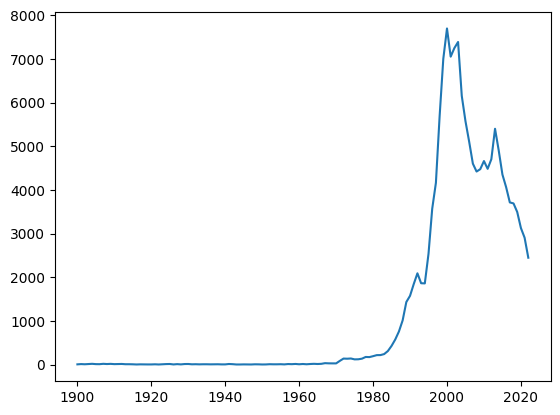

In [48]:
# on fait un graphique sous forme de courbe représentant ces données
plt.plot(prenom_hugo['année'], prenom_hugo["nombre"])

In [49]:
# TOP 10 des prénoms chez les garçons en 2022
prenoms_2022_h_top10 = prenoms_annees.loc[(prenoms_annees['année'] == 2022) & (prenoms_annees['sexe'] == 1), :]
prenoms_2022_h_top10.sort_values('nombre', ascending=False).head(10)

,sexe,prénoms,année,nombre
122,1,_PRENOMS_RARES,2022,27296
104049,1,GABRIEL,2022,4889
179029,1,LÉO,2022,4078
250608,1,RAPHAËL,2022,3798
192699,1,MAËL,2022,3571
186122,1,LOUIS,2022,3560
229641,1,NOAH,2022,3325
161089,1,JULES,2022,3308
31284,1,ARTHUR,2022,3284
7632,1,ADAM,2022,3212


In [50]:
# TOP 10 des prénoms chez les filles en 2022
prenoms_2022_f_top10 = prenoms_annees.loc[(prenoms_annees['année'] == 2022) & (prenoms_annees['sexe'] == 2), :]
prenoms_2022_f_top10.sort_values('nombre', ascending=False).head(10)

,sexe,prénoms,année,nombre
321403,2,_PRENOMS_RARES,2022,29396
477978,2,JADE,2022,3420
530740,2,LOUISE,2022,3412
338629,2,AMBRE,2022,3380
329590,2,ALBA,2022,3280
423666,2,EMMA,2022,3158
638397,2,ROSE,2022,2692
332775,2,ALICE,2022,2520
637216,2,ROMY,2022,2409
347243,2,ANNA,2022,2380


In [51]:
# Ratio filles / garçons entre 1900 et 2022
prenoms_ratiofg = prenoms_annees.groupby(['année','sexe'])['nombre'].sum()
display(prenoms_ratiofg)

année  sexe
1900   1       177387
       2       237653
1901   1       195964
       2       257492
1902   1       204354
                ...  
2020   2       351915
2021   1       372789
       2       355564
2022   1       364880
       2       347593
Name: nombre, Length: 246, dtype: int64

In [57]:
# Séparer les données par sexe
garcons = prenoms_ratiofg.loc[(prenoms_annees['sexe'] == 1), :]
filles = prenoms_ratiofg.loc[(prenoms_annees['sexe'] == 2), :]

# Tracer les courbes
plt.plot(garcons['année'], garcons['nombre'], label='garçons')
plt.plot(filles['année'], filles['nombre'], label='filles')

# Ajouter des étiquettes et une légende
plt.xlabel('Année')
plt.ylabel('Nombre total de prénoms')
plt.legend()

# Afficher le graphique
plt.show()

ValueError: cannot index with a boolean indexer that is not the same length as the index